In [32]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
import warnings
warnings.filterwarnings('ignore')

In [3]:
churndata = pd.read_csv('Customer-Churn.csv')
churndata.columns = [columns_name.lower() for columns_name in churndata.columns]
churndata

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,monthlycharges,totalcharges,churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes


In [5]:
#Data exploration

churndata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   seniorcitizen     7043 non-null   int64  
 2   partner           7043 non-null   object 
 3   dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   phoneservice      7043 non-null   object 
 6   onlinesecurity    7043 non-null   object 
 7   onlinebackup      7043 non-null   object 
 8   deviceprotection  7043 non-null   object 
 9   techsupport       7043 non-null   object 
 10  streamingtv       7043 non-null   object 
 11  streamingmovies   7043 non-null   object 
 12  contract          7043 non-null   object 
 13  monthlycharges    7043 non-null   float64
 14  totalcharges      7043 non-null   object 
 15  churn             7043 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory

In [6]:
#totalcharges isnt object
churndata['totalcharges'] = pd.to_numeric(churndata['totalcharges'],errors='coerce')
churndata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   seniorcitizen     7043 non-null   int64  
 2   partner           7043 non-null   object 
 3   dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   phoneservice      7043 non-null   object 
 6   onlinesecurity    7043 non-null   object 
 7   onlinebackup      7043 non-null   object 
 8   deviceprotection  7043 non-null   object 
 9   techsupport       7043 non-null   object 
 10  streamingtv       7043 non-null   object 
 11  streamingmovies   7043 non-null   object 
 12  contract          7043 non-null   object 
 13  monthlycharges    7043 non-null   float64
 14  totalcharges      7032 non-null   float64
 15  churn             7043 non-null   object 
dtypes: float64(2), int64(2), object(12)
memory

In [7]:
#Checking for null values

churndata.isna().sum()/len(churndata)

gender              0.000000
seniorcitizen       0.000000
partner             0.000000
dependents          0.000000
tenure              0.000000
phoneservice        0.000000
onlinesecurity      0.000000
onlinebackup        0.000000
deviceprotection    0.000000
techsupport         0.000000
streamingtv         0.000000
streamingmovies     0.000000
contract            0.000000
monthlycharges      0.000000
totalcharges        0.001562
churn               0.000000
dtype: float64

In [8]:
churndata['totalcharges'].isna().sum()

11

In [53]:
#churndata['totalcharges'] = churndata['totalcharges'].fillna(churndata['totalcharges'].mean())

In [71]:
most=churndata['totalcharges'].value_counts(sort=True).reset_index().iloc[0,0]
churndata['totalcharges']=churndata['totalcharges'].fillna(most)

In [72]:
churndata['totalcharges'].value_counts(dropna=False)

20.20      22
19.75       9
20.05       8
19.90       8
19.65       8
           ..
6849.40     1
692.35      1
130.15      1
3211.90     1
6844.50     1
Name: totalcharges, Length: 6530, dtype: int64

In [73]:
churndata.isna().sum()/len(churndata)

gender              0.0
seniorcitizen       0.0
partner             0.0
dependents          0.0
tenure              0.0
phoneservice        0.0
onlinesecurity      0.0
onlinebackup        0.0
deviceprotection    0.0
techsupport         0.0
streamingtv         0.0
streamingmovies     0.0
contract            0.0
monthlycharges      0.0
totalcharges        0.0
churn               0.0
dtype: float64

In [74]:
numerical = churndata.select_dtypes([np.number])
numerical.describe()

,seniorcitizen,tenure,monthlycharges,totalcharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.765853
std,0.368612,24.559481,30.090047,2266.762876
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [75]:
#Scale features from the numerical dataframe, and first adding the libraries needed and then the scaling itself

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(numerical)
X = scaler.transform(numerical)
y = churndata['churn']

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42)
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=1/3)

In [77]:
classification = LogisticRegression(random_state=42) 

classification.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [78]:
predictions = classification.predict(X_train)
predictions
accuracy_score(y_train,predictions)

0.7910543130990415

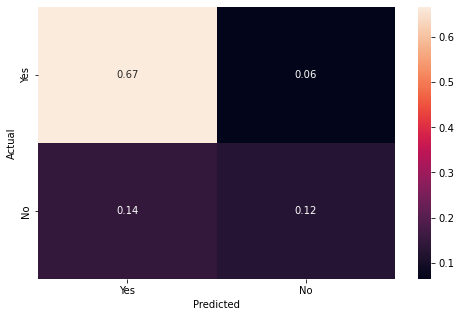

In [79]:
cf_matrix = confusion_matrix(y_train, predictions, normalize='all')
plt.figure(figsize=(8,5))
sns.heatmap(cf_matrix, annot=True,  fmt='.2f', xticklabels=['Yes', 'No'], yticklabels=['Yes', 'No'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [80]:
y_pred_train = classification.predict(X_train)
print(classification_report(y_train, predictions))

              precision    recall  f1-score   support

          No       0.82      0.91      0.86      3432
         Yes       0.66      0.46      0.54      1263

    accuracy                           0.79      4695
   macro avg       0.74      0.69      0.70      4695
weighted avg       0.78      0.79      0.78      4695



We can see our dataset is imbalanced as we have "Support" is 3450 for No but only 1245 for Yes, so now we deal with the imbalance

In [81]:
#smote
smote = SMOTE()

sm_X_train, sm_X_test, sm_y_train, sm_y_test = train_test_split(X, y, test_size=1/3, random_state=42)

sm_X_train, sm_y_train = smote.fit_resample(sm_X_train, sm_y_train)


In [82]:
classification.fit(sm_X_train, sm_y_train)
sm_predictions = classification.predict(sm_X_train)

accuracy_score(sm_y_train,sm_predictions)

0.725

In [83]:
sm_y_pred_train = classification.predict(sm_X_train)
print(classification_report(sm_y_train, sm_predictions))

              precision    recall  f1-score   support

          No       0.73      0.72      0.72      3460
         Yes       0.72      0.73      0.73      3460

    accuracy                           0.73      6920
   macro avg       0.73      0.72      0.72      6920
weighted avg       0.73      0.72      0.72      6920



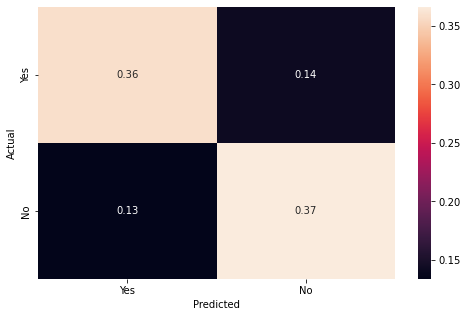

In [84]:
sm_cf_matrix = confusion_matrix(sm_y_train, sm_predictions, normalize='all')
plt.figure(figsize=(8,5))
sns.heatmap(sm_cf_matrix, annot=True,  fmt='.2f', xticklabels=['Yes', 'No'], yticklabels=['Yes', 'No'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [85]:
tl = TomekLinks()
tl_X_train, tl_X_test, tl_y_train, tl_y_test = train_test_split(X, y, test_size=1/3, random_state=42)

tl_X_train, tl_y_train = tl.fit_resample(tl_X_train, tl_y_train)


In [86]:
classification.fit(tl_X_train, tl_y_train)
tl_predictions = classification.predict(tl_X_train)

accuracy_score(tl_y_train,tl_predictions)

0.7867189301360388

In [87]:
tl_y_pred_train = classification.predict(tl_X_train)
print(classification_report(tl_y_train, tl_predictions))

              precision    recall  f1-score   support

          No       0.82      0.90      0.86      3102
         Yes       0.67      0.51      0.57      1235

    accuracy                           0.79      4337
   macro avg       0.74      0.70      0.72      4337
weighted avg       0.78      0.79      0.78      4337



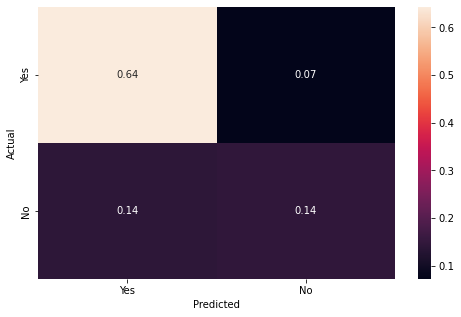

In [88]:
tl_cf_matrix = confusion_matrix(tl_y_train, tl_predictions, normalize='all')
plt.figure(figsize=(8,5))
sns.heatmap(tl_cf_matrix, annot=True,  fmt='.2f', xticklabels=['Yes', 'No'], yticklabels=['Yes', 'No'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Overall, Tomeklinks which is undersampling technique improved our model perfomance better than Smote (oversampling technique), it improved all the score for positive result which matches with our intention to predict churn customer (True positive)